# ANZ Virtual Intership

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

# Exploratory Data Analysis
Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

Put together 2-3 slides summarising your most interesting findings to ANZ management.

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
transactions = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
# Returns the first x number of rows when head(num). Without a number it returns 5
transactions.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

Each row represents one transaction. There are 23 attributes that are listed below.

In [4]:
# Returns basic information on all columns
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

There are 12,043 instances in the dataset. Notice that the following attributes present nonnull values:
* `card_present_flag`
* `bpay_biller_code`
* `merchant_id`
* `merchant_code`
* `merchant_suburb`
* `merchant_state`
* `merchant_long_lat`

Meaning that transaction information are missing from these features. Let`s visualize these missing values

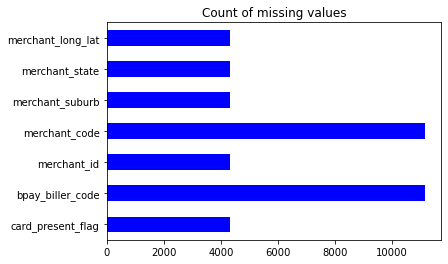

In [5]:
# Count of variables with missing values
columns_with_missing_values = transactions.columns[transactions.isnull().any()]
transactions[columns_with_missing_values].isnull().sum().plot(kind='barh',title='Count of missing values',color='b')

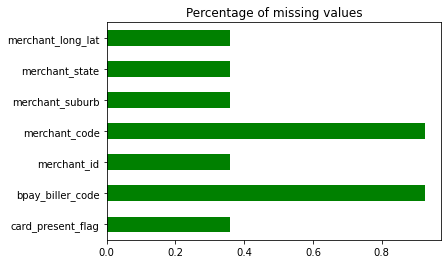

In [6]:
# Percentage of variables with missing values
(transactions[columns_with_missing_values].isnull().sum() / len(transactions)).plot(kind='barh',title='Percentage of missing values',color='g')

From the graphs from above we can observe that:
* `card_present_flag`, `merchant_id`, `merchant_suburb`, `merchant_state`, `merchant_long_lat`. Around 4.000 transactions are missing these features, Meaning that 35% of the data is missing from these attributes 
* `bpay_biller_code`, `merchant_code`, Around 11.000 transactions are missing these features, Meaning that 90% of the data is missing from these attributes

Most Machine Learning algorithms cannot work with missing features, so later we need to create
a few functions to take care of them. There are three options to deal with missing values:
1. Get rid of the corresponding transactions.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

In [7]:
# Returns basic statistics on numeric columns
transactions.describe().T

count          mean           std    min       25%  \
card_present_flag   7717.0      0.802644      0.398029   0.00     1.000   
merchant_code        883.0      0.000000      0.000000   0.00     0.000   
balance            12043.0  14704.195553  31503.722652   0.24  3158.585   
age                12043.0     30.582330     10.046343  18.00    22.000   
amount             12043.0    187.933588    592.599934   0.10    16.000   

                       50%        75%        max  
card_present_flag     1.00      1.000       1.00  
merchant_code         0.00      0.000       0.00  
balance            6432.01  12465.945  267128.52  
age                  28.00     38.000      78.00  
amount               29.00     53.655    8835.98

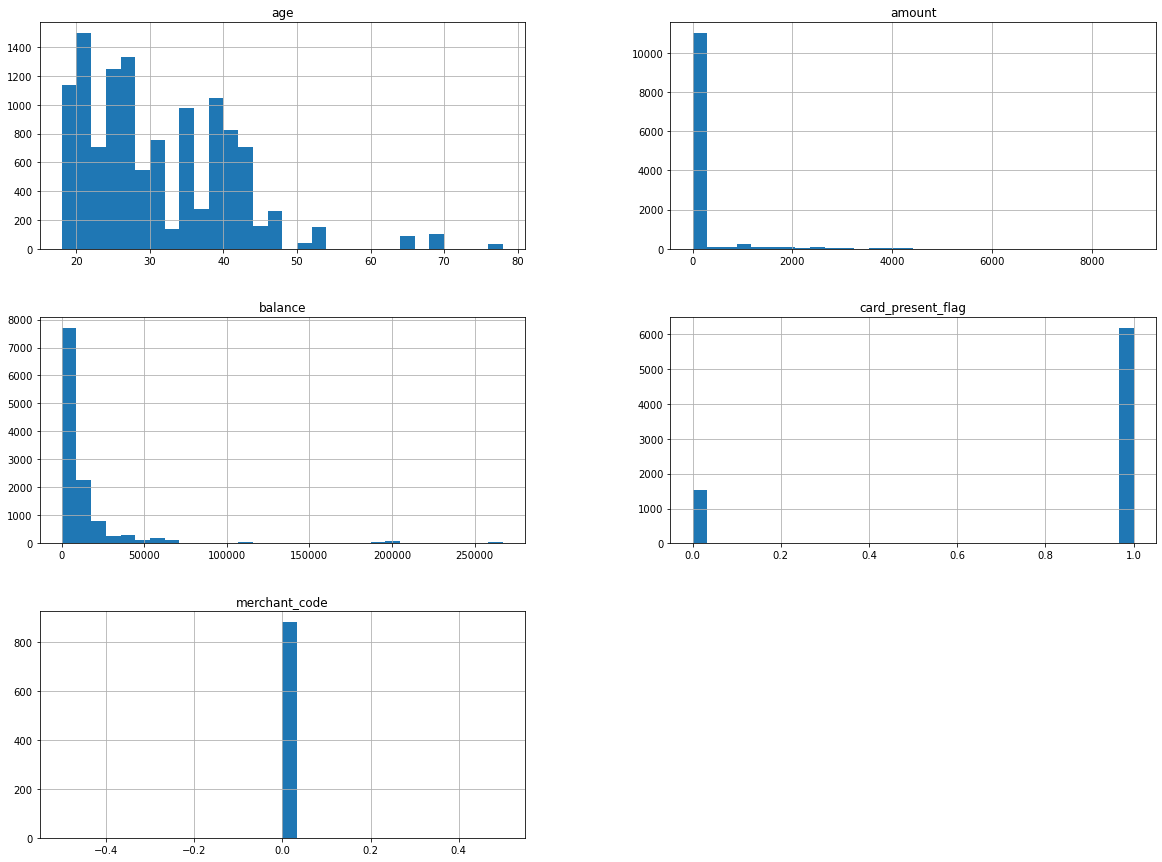

In [8]:
#  A histogram for each numerical attribute
transactions.hist(bins=30,figsize=(20,15))
plt.show()

From the above we can see that:
* The average Age is 30 years, but with a range from 18 to 78 years old
* Most amounts values seems to be concentrate in small values, we can see that 50% of the values are between 16.00 and 53.65 AUD and there are many outliers, one of which is the maximun amount of 8835 AUD that are affecting the mean value in this case of 187 AUD (See boxplot for more details).
* Asuming that the attribute `card_present_flag` uses OneHotEncoding, meaning that if the value is 0 the transaction does not present flagging and 1 otherwise. We can observed that 80% of the transactions presented flagging. We need to have in mind that there are some mising values 

Text(0.5, 1.0, 'Boxplot Amount (AUD) With Outliers')

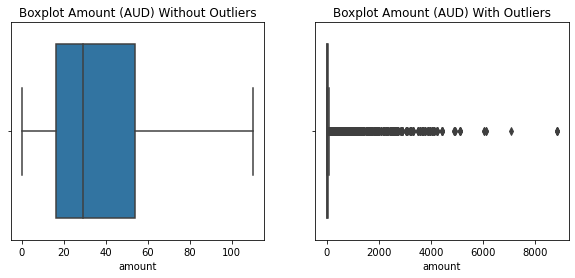

In [9]:
#  Boxplots for the amount attribute
fig, ax = plt.subplots(1, 2, figsize=(10,4))  
sns.boxplot(x=transactions['amount'], showfliers=False, ax=ax[0])
ax[0].set_title('Boxplot Amount (AUD) Without Outliers')
sns.boxplot(x=transactions['amount'], showfliers=True, ax=ax[1])
ax[1].set_title('Boxplot Amount (AUD) With Outliers')
#fig.savefig('Boxplot_Amount.png')

Text(0, 0.5, '% of Transactions')

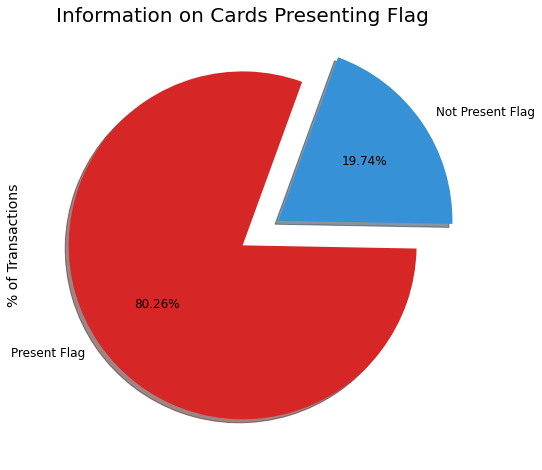

In [10]:
#  Pie chart for the card_present_flag attribute
f, ax = plt.subplots(figsize=(16,8))

colors = ["#D72626","#3791D7"]
labels ="Present Flag", "Not Present Flag"

plt.title('Information on Cards Presenting Flag', fontsize=20)

transactions['card_present_flag'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax.set_ylabel('% of Transactions', fontsize=14)

In [11]:
# Separating de date column into 2 different columns for month and day, plus the extraction column to obtain the hour
# Not year because the whole dataset is done with information of just one year 2018
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['extraction'] = pd.to_datetime(transactions['extraction'])

transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['hour'] = transactions['extraction'].dt.hour



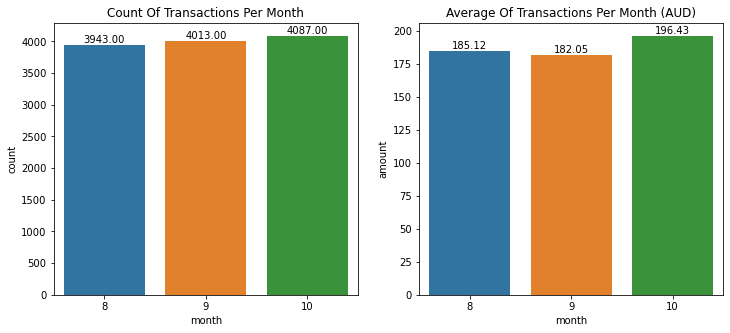

In [12]:
#How many transactions do customers make each month, on average?
fig, ax = plt.subplots(1, 2, figsize=(12,5))  

count_plot = sns.countplot(x='month',data=transactions, ax=ax[0])
ax[0].set_title('Count Of Transactions Per Month')

bar_plot = sns.barplot(x='month',y='amount', data=transactions, ci=None,  ax=ax[1])
ax[1].set_title('Average Of Transactions Per Month (AUD)')


graphs = [count_plot, bar_plot]
for graph in graphs:
    for p in graph.patches:
        graph.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()), ha = 'center',
                       va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
#fig.savefig('count_avg_transaction_per_month.png')

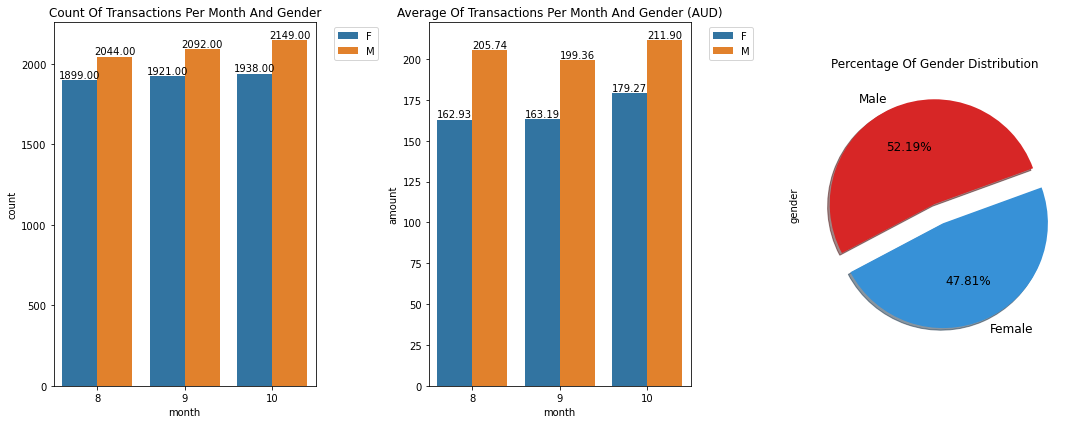

In [13]:
#How many transactions do customers of each gender make each month, on average?
fig, ax = plt.subplots(1, 3, figsize=(15,6))  

count_plot = sns.countplot(x='month', hue='gender', data=transactions, ax=ax[0])
ax[0].set_title('Count Of Transactions Per Month And Gender')
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

bar_plot = sns.barplot(x='month',y='amount', hue='gender', data=transactions, ci=None,  ax=ax[1])
ax[1].set_title('Average Of Transactions Per Month And Gender (AUD)')
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

transactions['gender'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=['Male','Female'], fontsize=12, startangle=20)
ax[2].set_title('Percentage Of Gender Distribution')

plt.tight_layout()

graphs = [count_plot, bar_plot]
for graph in graphs:
    for p in graph.patches:
        graph.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()), ha = 'center',
                       va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')

In [14]:
#Creating new column to obtain the day of the week
transactions['weekday'] = transactions['date'].dt.weekday

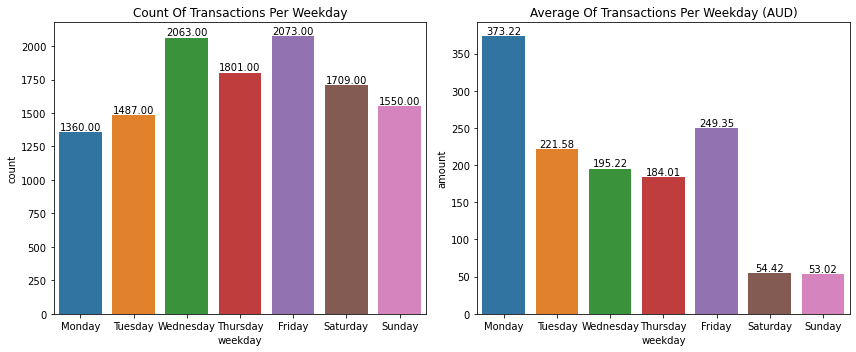

In [15]:
#How many transactions do customers make each weekday, on average?
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(1, 2, figsize=(12,5))  

gc = count_plot = sns.countplot(x='weekday',data=transactions, ax=ax[0])
ax[0].set_title('Count Of Transactions Per Weekday')

gb = bar_plot = sns.barplot(x='weekday',y='amount', data=transactions, ci=None,  ax=ax[1])
ax[1].set_title('Average Of Transactions Per Weekday (AUD)')

gc.set(xticklabels=weekdays)
gb.set(xticklabels=weekdays)


graphs = [count_plot, bar_plot]
for graph in graphs:
    for p in graph.patches:
        graph.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()), ha = 'center',
                       va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
        
plt.tight_layout()
#fig.savefig('count_avg_transaction_per_weekday.png')

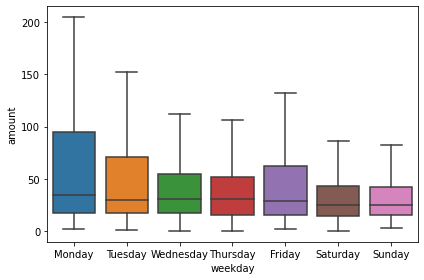

In [16]:
#  Boxplot for the amount each day
g = sns.boxplot(x='weekday', y='amount', data=transactions, showfliers=False)
g.set(xticklabels=weekdays)
plt.tight_layout()

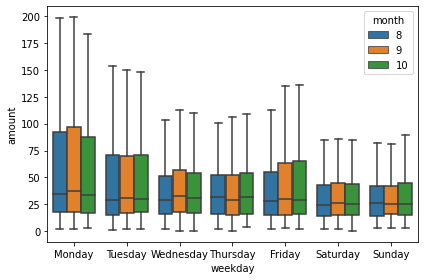

In [17]:
#  Boxplots for the amount each day per month
g = sns.boxplot(x='weekday', y='amount', hue='month', data=transactions, showfliers=False)
g.set(xticklabels=weekdays)
plt.tight_layout()

In [18]:
#Creating new column to obtain the age category
transactions['age_cat'] = pd.cut(transactions['age'],
                               bins=[17,25,35,45,55,np.inf],
                               labels =[1,2,3,4,5])

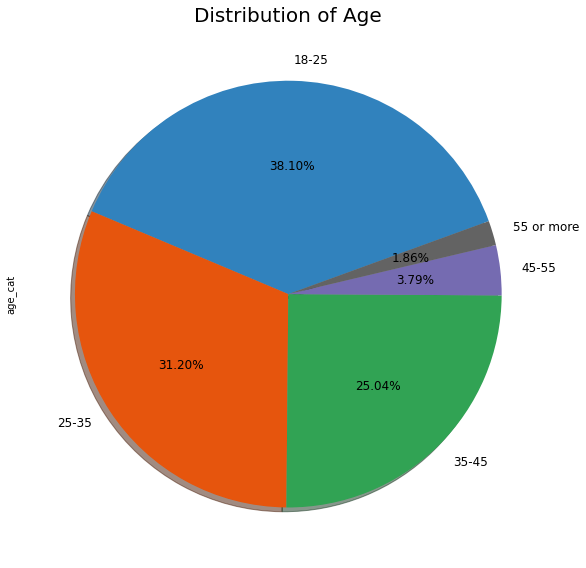

In [19]:
#  Pie chart for the age category attribute distribution
f, ax = plt.subplots(figsize=(10,8))

#colors = ["#D72626","#3791D7"]
labels ="18-25", "25-35", "35-45", "45-55", "55 or more"

plt.title('Distribution of Age', fontsize=20)
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(5)*4)

transactions['age_cat'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, colors=colors, fontsize=12, startangle=20,labels=labels )

plt.tight_layout()

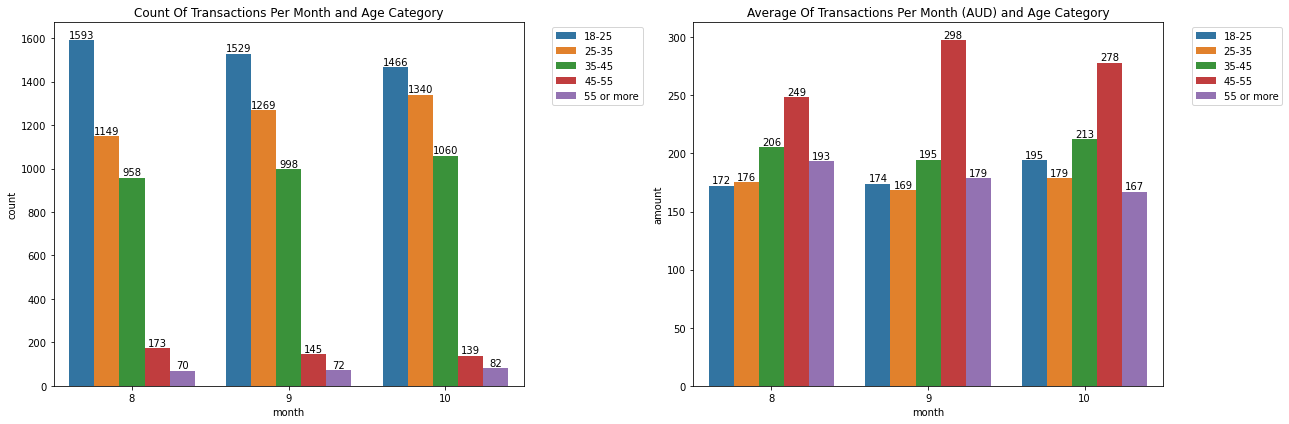

In [20]:
#How many transactions do customers make each month per age category, on average?
fig, ax = plt.subplots(1, 2, figsize=(18,6))  

count_plot = sns.countplot(x='month', hue='age_cat', data=transactions, ax=ax[0])
ax[0].set_title('Count Of Transactions Per Month and Age Category')
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', labels=labels)
#ax[0].set(labels=labels)
    
bar_plot = sns.barplot(x='month',y='amount', hue='age_cat', data=transactions, ci=None,  ax=ax[1])
ax[1].set_title('Average Of Transactions Per Month (AUD) and Age Category')
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', labels=labels)

plt.tight_layout()

graphs = [count_plot, bar_plot]
for graph in graphs:
    for p in graph.patches:
        graph.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()), ha = 'center',
                       va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')
fig.savefig('count_avg_transaction_per_age_month.png')

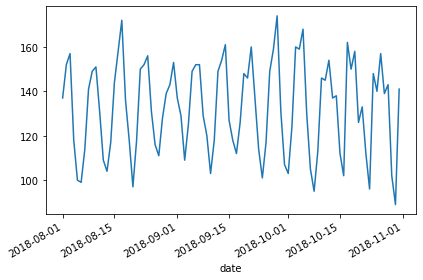

In [21]:
#Plot representing transactions per day
transactions.groupby('date').count()['status'].plot()
plt.tight_layout()

In [22]:
# Dataframe of the amount of transactions per hour and weekday
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

dayHour = transactions.groupby(by=['weekday','hour']).count()['status'].unstack()
dayHour.index = dayHour.index.map(dmap)

dayHour

hour     0   1   2   3   4   5   6   7    8    9   ...   14   15   16   17  \
weekday                                            ...                       
Mon       9  17  14  32  18  14  27  13   54  171  ...   89   70   28   85   
Tue      10  23  27  34  46  33  24  55   62  188  ...  104   91   73  142   
Wed      12  38  19   7  31   5  64  53  129  222  ...  124  170  109  162   
Thu      18  30  32  30  59  31  37  49  101  183  ...  110  140   69  133   
Fri      22  34  32  34  67  26  49  40   92  131  ...  132  121  118  123   
Sat      19  37  50  24  53  62  18  20   55   92  ...  110   73   76   97   
Sun      18  35  38  35  35  38  30  36   54  119  ...   88   63   43   73   

hour     18   19   20   21  22  23  
weekday                             
Mon      28   36   87   66  50  34  
Tue      59   41   61   41  33  38  
Wed      52   88   90   72  47  82  
Thu      70   96   48   68  84  68  
Fri      79  137   87  183  69  73  
Sat      50   73  114  168  95  92  
Sun      45   77  111  143  80  39  

[7 rows x 24 columns]

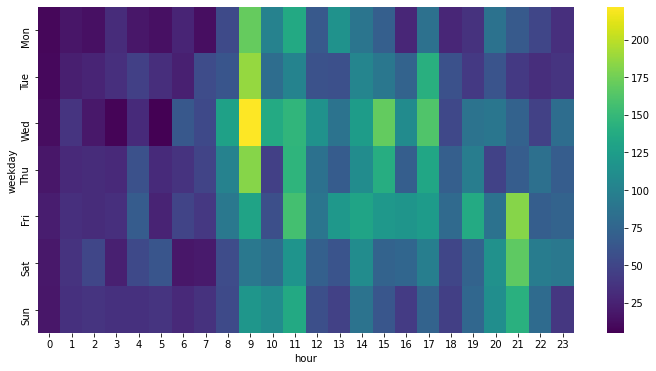

In [23]:
# Heatmap of transactions per hour and weekday
fig = plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
#fig.savefig('heatmap_transactions_per_hour_and_weekday.png')

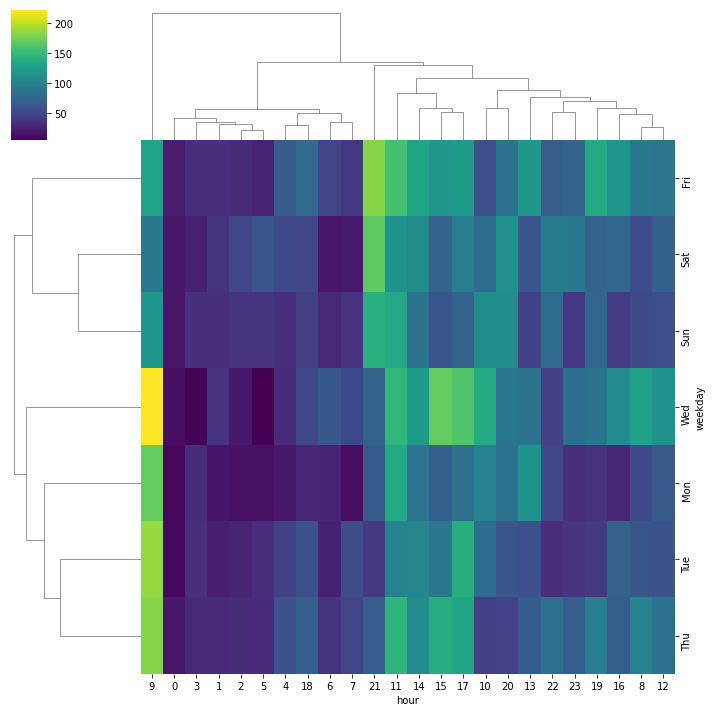

In [24]:
# Clustermap of transactions per hour and weekday
sns.clustermap(dayHour,cmap='viridis')

In [25]:
# Dataframe of the amount of transactions per month and weekday
dayMonth = transactions.groupby(by=['weekday','month']).count()['status'].unstack()
dayMonth.index = dayMonth.index.map(dmap)
dayMonth

month     8    9    10
weekday               
Mon      411  425  524
Tue      477  486  524
Wed      711  595  757
Thu      596  611  594
Fri      789  647  637
Sat      516  661  532
Sun      443  588  519

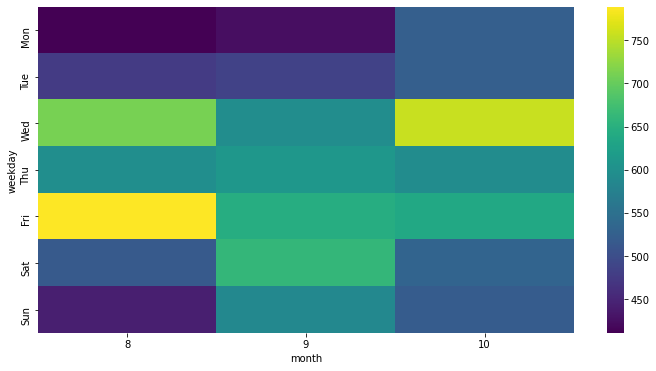

In [26]:
# Heatmap of transactions per month and weekday
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

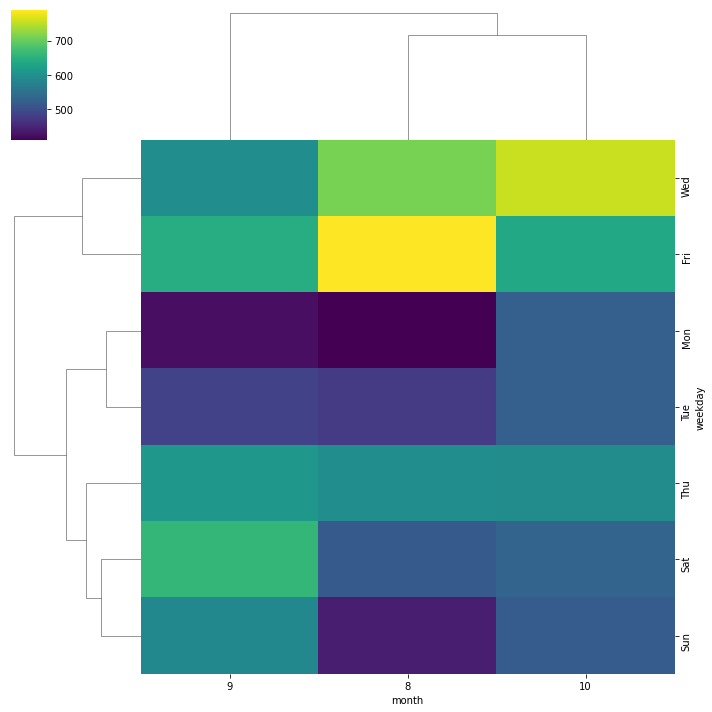

In [27]:
# Clustermap of transactions per month and weekday
sns.clustermap(dayMonth,cmap='viridis')

In [28]:
# Function to change abbrebation name to full name of state
def state_name(merchant_state):
    if merchant_state == 'QLD':
        return 'Queensland'
    elif merchant_state == 'NSW':
        return 'New South Wales'
    elif merchant_state == 'VIC':
        return 'Victoria'
    elif merchant_state == 'WA':
        return 'Western Australia'
    elif merchant_state == 'SA':
        return 'South Australia'
    elif merchant_state == 'NT':
        return 'Northern Territory'
    elif merchant_state == 'TAS':
        return 'Tasmania'
    elif merchant_state == 'ACT':
        return 'Australian Capital Territory'

In [29]:
# Dataframe of the amount of transactions per state and month
stateMonth_count = transactions.groupby(by=['merchant_state','month']).count()['status'].unstack()
stateMonth_count.index = stateMonth_count.index.map(state_name)
stateMonth_count

month                          8    9    10
merchant_state                             
Australian Capital Territory   25   22   26
New South Wales               715  721  733
Northern Territory             66   88   51
Queensland                    509  511  536
South Australia               141  140  134
Tasmania                       29   19   20
Victoria                      678  758  695
Western Australia             372  342  386

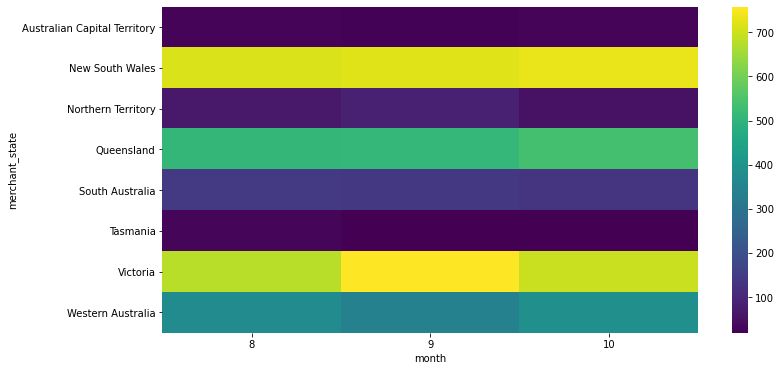

In [30]:
# Heatmap of transactions per month and weekday
plt.figure(figsize=(12,6))
sns.heatmap(stateMonth_count,cmap='viridis')

<Figure size 864x288 with 0 Axes>

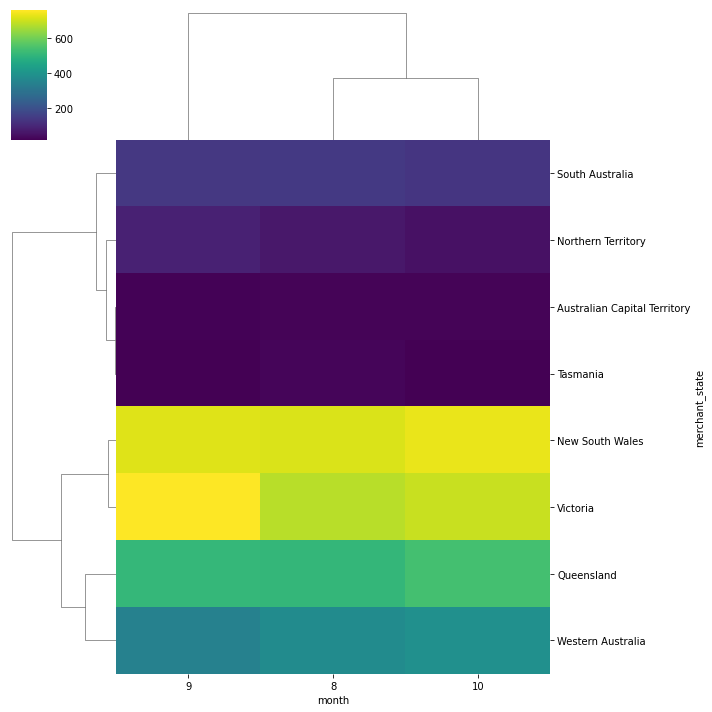

In [31]:
# Clustermap of transactions per month and state
fig = plt.figure(figsize=(12,4))
sns.clustermap(stateMonth_count,cmap='viridis')
plt.show()
fig.savefig('clustermap_transactions_per_month_and_state.png')

In [32]:
# Dataframe of the sum of transactions per state and month
stateMonth_sum = transactions.groupby(by=['merchant_state','month']).sum()['amount'].unstack()
stateMonth_sum.index = stateMonth_sum.index.map(state_name)
stateMonth_sum

month                               8         9         10
merchant_state                                            
Australian Capital Territory   1880.87    766.57   2229.24
New South Wales               28963.80  43776.36  29281.61
Northern Territory             2512.62   4905.27   1751.00
Queensland                    13020.05  14156.27  26307.13
South Australia                4995.63   6707.09   5073.85
Tasmania                        783.33    501.34    678.26
Victoria                      27685.20  29936.34  29962.46
Western Australia             11757.69  10574.36  11660.01

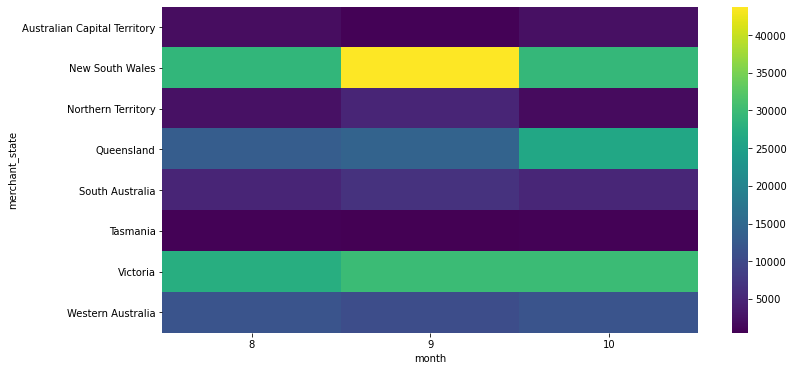

In [33]:
# Heatmap of transactions per month and state
plt.figure(figsize=(12,6))
sns.heatmap(stateMonth_sum,cmap='viridis')

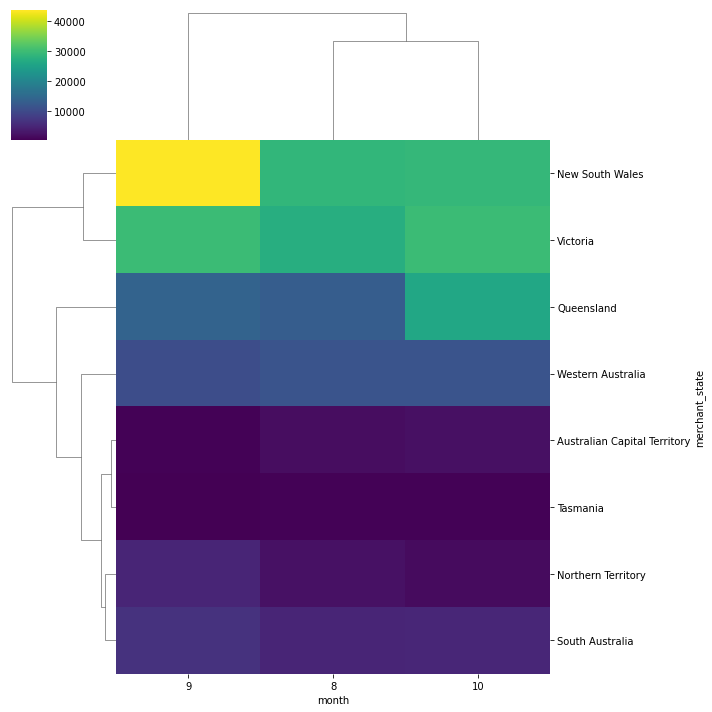

In [34]:
# Clustermap of transactions per month and state
sns.clustermap(stateMonth_sum,cmap='viridis')

In [35]:
stateMonth_count['total'] = stateMonth_count.sum(axis=1)

In [36]:
import plotly.graph_objects as go
import json
from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/rowanhogan/australian-states/master/states.geojson') as response:
    counties = json.load(response)
locs = stateMonth_count.index

for loc in counties['features']:
    loc['id'] = loc['properties']['STATE_NAME']
    
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=stateMonth_count['total'],
                    colorscale='Viridis',
                    colorbar_title="Amount of Transactions"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=2.5,
                        mapbox_center = {"lat": -25.2744, "lon": 133.7751})
fig.show()

In [37]:
stateMonth_sum['total'] = stateMonth_sum.sum(axis=1)

In [38]:
with urlopen('https://raw.githubusercontent.com/rowanhogan/australian-states/master/states.geojson') as response:
    counties = json.load(response)
locs = stateMonth_sum.index

for loc in counties['features']:
    loc['id'] = loc['properties']['STATE_NAME']
    
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations=locs,
                    z=stateMonth_sum['total'],
                    colorscale='Viridis',
                    colorbar_title="AUD"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=2.5,
                        mapbox_center = {"lat": -25.2744, "lon": 133.7751})
fig.show()

# Predictive Analytics
Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [39]:
salary = transactions[transactions['txn_description']=='PAY/SALARY']

In [40]:
salary['long'] = salary['long_lat'].apply(lambda x: x.split('-')[0])
salary['lat'] = salary['long_lat'].apply(lambda x: x.split('-')[1])
salary['long'] = pd.to_numeric(salary['long'])
salary['lat'] = pd.to_numeric(salary['lat']) * -1
salary['age_cat'] = pd.to_numeric(salary['age_cat'])

C:\Users\Diego\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Diego\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Diego\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [41]:
customers = salary.groupby(['customer_id','month']).agg({'amount': np.sum, 'long': np.unique, 'lat': np.unique,
                                            'gender':np.unique, 'age_cat': np.mean}).reset_index()

In [42]:
customers = customers.groupby('customer_id').mean().reset_index()
customers.head()

customer_id  month       amount    long    lat  age_cat
0  CUS-1005756958    9.0  4205.370000  153.03 -27.51      4.0
1  CUS-1117979751    9.0  8350.183333  115.81 -31.82      1.0
2  CUS-1140341822    9.0  3833.020000  144.97 -37.42      2.0
3  CUS-1147642491    9.0  7416.023333  151.04 -33.77      2.0
4  CUS-1196156254    9.0  9108.703333  138.52 -35.01      2.0

In [43]:
customers_state = transactions.groupby('customer_id')['merchant_state'].agg(lambda x:x.value_counts().index[0]).reset_index()

In [44]:
customer_salary = pd.merge(customers, customers_state, on='customer_id')

In [45]:
customer_salary.drop(['month','customer_id'], axis=1,inplace=True)

In [46]:
customer_salary.head()

amount    long    lat  age_cat merchant_state
0  4205.370000  153.03 -27.51      4.0            QLD
1  8350.183333  115.81 -31.82      1.0             WA
2  3833.020000  144.97 -37.42      2.0            VIC
3  7416.023333  151.04 -33.77      2.0            NSW
4  9108.703333  138.52 -35.01      2.0             SA

In [47]:
corr_matrix = customer_salary.corr()

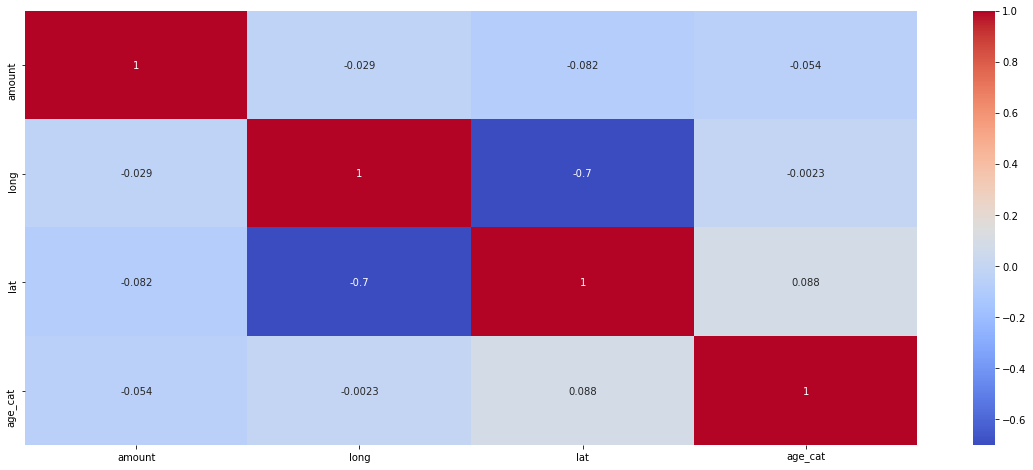

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

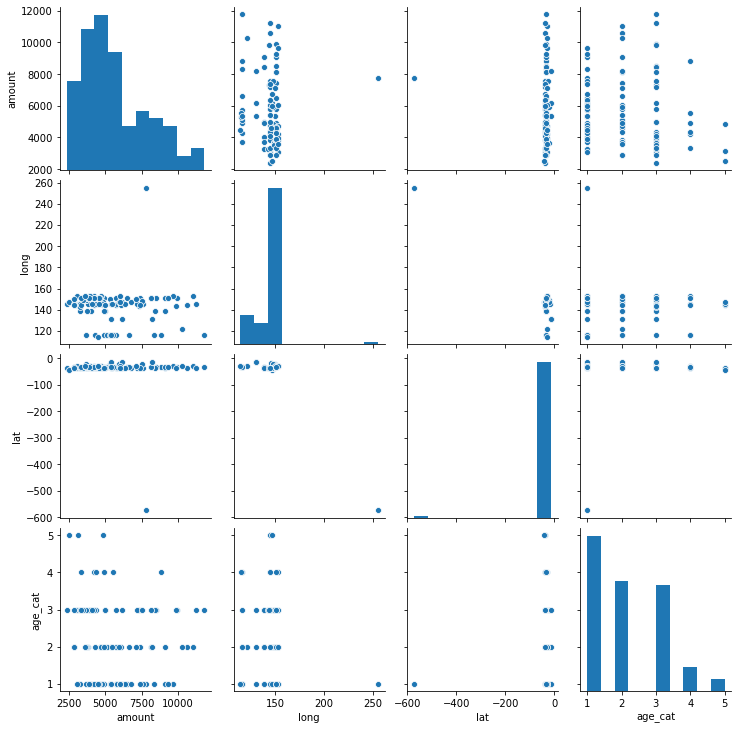

In [49]:
sns.pairplot(customer_salary)

In [50]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(customer_salary, test_size=0.2, random_state=42)

In [51]:
customer_salary = train_set.drop('amount',axis=1)
customer_salary_labels = train_set['amount'].copy()

In [52]:
customer_salary.columns

Index(['long', 'lat', 'age_cat', 'merchant_state'], dtype='object')

In [53]:
customer_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 55 to 51
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   long            80 non-null     float64
 1   lat             80 non-null     float64
 2   age_cat         80 non-null     float64
 3   merchant_state  80 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.1+ KB


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['long', 'lat'] 
cat_attribs = ['age_cat',"merchant_state"]

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
 ])

customer_salary_prepared = full_pipeline.fit_transform(customer_salary)

In [55]:
customer_salary_prepared[0]

array([0.59322004, 0.19816682, 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        ])

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [57]:
# evaluate each model in turn
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFC', RandomForestRegressor()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, customer_salary_prepared, customer_salary_labels, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_results)
    results.append(rmse_scores)
    names.append(name)
    print('%s: %f (%f)' % (name, rmse_scores.mean(), rmse_scores.std()))

LR: 2735.898008 (1435.655688)
DTR: 3351.526578 (990.383999)
RFC: 2544.956593 (679.883295)


In [58]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(customer_salary_prepared, customer_salary_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [60]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2832.472390219084 {'max_features': 2, 'n_estimators': 3}
2768.1023539615367 {'max_features': 2, 'n_estimators': 10}
2632.19776134408 {'max_features': 2, 'n_estimators': 30}
2790.629441959032 {'max_features': 4, 'n_estimators': 3}
2666.3624281282177 {'max_features': 4, 'n_estimators': 10}
2612.1715866392556 {'max_features': 4, 'n_estimators': 30}
2813.7759630857136 {'max_features': 6, 'n_estimators': 3}
2648.7357223952918 {'max_features': 6, 'n_estimators': 10}
2585.932110491836 {'max_features': 6, 'n_estimators': 30}
2778.743166259528 {'max_features': 8, 'n_estimators': 3}
2600.8168895373788 {'max_features': 8, 'n_estimators': 10}
2593.097182897753 {'max_features': 8, 'n_estimators': 30}
3014.3366950277727 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2948.7880383022884 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2874.4178874021795 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2872.3313686637744 {'bootstrap': False, 'max_features': 3, 'n_estima

In [61]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("amount", axis=1)
y_test = test_set["amount"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [62]:
final_rmse

2344.751411495699

In [63]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1507.18959842, 2953.65838882])